In [12]:

#数据加载
import pandas as pd
import numpy as np
data = pd.read_csv('task2_data.csv')
data.head()

,pay1,pay2,y
0,2.89738,0.057948,1
1,10.38230,8.777660,0
2,14.00400,87.967200,1
3,104.30600,45.734200,1
4,80.88530,113.010600,1


AttributeError: module 'matplotlib.pyplot' has no attribute 'paylabel'

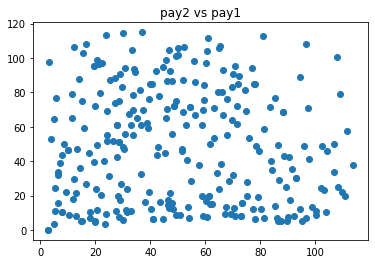

In [13]:
#数据可视化
from matplotlib import pyplot as plt
fig1= plt.figure()
pay1 = data.loc[:,'pay1']
pay2 = data.loc[:,'pay2']
y = data.loc[:,'y']
plt.scatter(pay1,pay2)
plt.title('pay2 vs pay1')
plt.paylabel('pay1')
plt.ylabel('pay2')
plt.show()

In [31]:
#创建mask
result= y==1
print(result)

0       True
1      False
2       True
3       True
4       True
       ...  
268     True
269     True
270    False
271    False
272    False
Name: y, Length: 273, dtype: bool


AttributeError: module 'matplotlib.pyplot' has no attribute 'paylabel'

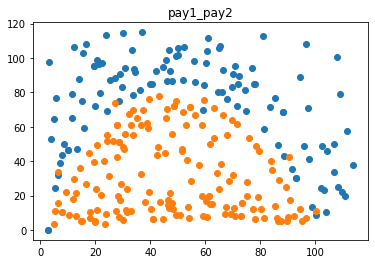

In [32]:

fig1= plt.figure()
abnormal = plt.scatter(pay1[result],pay2[result])
normal = plt.scatter(pay1[~result],pay2[~result])

plt.title('pay1_pay2')
plt.paylabel('pay1')
plt.ylabel('pay2')
plt.legend((abnormal,normal),('abnormal','normal'))
plt.show()

In [15]:

#赋值
X = data.drop(['y'],axis=1)

print(X.shape,y.shape)

(273, 2) (273,)


In [16]:
#建立线性边界分类模型
from sklearn.linear_model import LogisticRegression
LR_1 = LogisticRegression()
LR_1.fit(X,y)


LogisticRegression()

In [17]:
#模型预测
y_predict = LR_1.predict(X)
print(y_predict)
print(y)

[0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0
 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1
 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1
 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1
 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0
 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0
 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 0 1 1 0 1 0]
0      1
1      0
2      1
3      1
4      1
      ..
268    1
269    1
270    0
271    0
272    0
Name: y, Length: 273, dtype: int64


In [18]:

#模型评估
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
print(accuracy)

0.8021978021978022


In [19]:
#获取边界函数的参数
print(LR_1.intercept_)
print(LR_1.coef_)

[-4.40891298]
[[0.01987184 0.05845463]]


In [20]:
theta0 = LR_1.intercept_[0]
theta1, theta2 = LR_1.coef_[0][0],LR_1.coef_[0][1]
print('t0:',theta0,'\nt1：',theta1,'\nt2：',theta2)

t0: -4.408912980966199 
t1： 0.019871842206776492 
t2： 0.05845462890840053


In [21]:
pay1.head()

0      2.89738
1     10.38230
2     14.00400
3    104.30600
4     80.88530
Name: pay1, dtype: float64

In [22]:
#基于逻辑回归计算函数的参数计算所对应的的pay2（也就是y-axis)
pay2_pre = -(theta0+theta1*pay1)/theta2
pay2_pre

0      74.439557
1      71.895034
2      70.663826
3      39.965365
4      47.927309
         ...    
268    53.344668
269    69.760910
270    68.858028
271    54.001322
272    67.134329
Name: pay1, Length: 273, dtype: float64

NameError: name 'result' is not defined

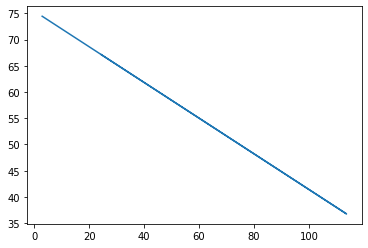

In [23]:
plt.plot(pay1,pay2_pre)
abnormal = plt.scatter(pay1[result],pay2[result])
normal = plt.scatter(pay1[~result],pay2[~result])
plt.legend((abnormal,normal),('abnormal','normal'))
plt.show()

我们可以看到，这个线性回归的预测并不是特别的准确，接下来我们要来改进我们的边界函数
  从一次改成二次



In [24]:
#生成二次项
pay1_2 = pay1*pay1
pay2_2 = pay2*pay2
pay1_pay2 = pay1*pay2
#取第一个元素看一下
print(pay1[0],pay2[0],pay1_2[0],pay2_2[0],pay1_pay2[0])

2.89738 0.0579476 8.3948108644 0.00335792434576 0.167896217288


In [25]:
#创建二次分类边界数据（整理数据）
#创建一个字典
pay_new = {'pay1':pay1,'pay2':pay2,'pay1_2':pay1_2,'pay2_2':pay2_2,'pay1_pay2':pay1_pay2}
#给字典转换格式
pay_new = pd.DataFrame(pay_new)

print(pay_new)

          pay1        pay2        pay1_2        pay2_2    pay1_pay2
0      2.89738    0.057948      8.394811      0.003358     0.167896
1     10.38230    8.777660    107.792153     77.047315    91.132299
2     14.00400   87.967200    196.112016   7738.228276  1231.892669
3    104.30600   45.734200  10879.741636   2091.617050  4770.351465
4     80.88530  113.010600   6542.431756  12771.395712  9140.896284
..         ...         ...           ...           ...          ...
268   64.94970  106.091800   4218.463530  11255.470027  6890.630582
269   16.66000  108.059800    277.555600  11676.920376  1800.276268
270   19.31590   39.515800    373.103993   1561.498450   763.283241
271   63.01810   70.852400   3971.280928   5020.062586  4464.983628
272   24.38630   55.457000    594.691628   3075.478849  1352.391039

[273 rows x 5 columns]


In [26]:
#我们现在要用这5个来构造我们的逻辑回归方程
LR2 = LogisticRegression()
LR2.fit(pay_new,y)

LogisticRegression()

In [27]:
y2_pre = LR2.predict(pay_new)
print(y2_pre)

[0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0
 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1
 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1
 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1
 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0
 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0
 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 0 1 1 0 0 0]


In [28]:
accuracy2 = accuracy_score(y,y2_pre)
print(accuracy2)
#至此，我们已经得到了一个相对而言非常非常准确的模型了

0.9743589743589743


In [29]:
#边界函数参数获取
theta0 = LR2.intercept_

theta1,theta2,theta3,theta4,theta5 = LR2.coef_[0][0],LR2.coef_[0][1],LR2.coef_[0][2],LR2.coef_[0][3],LR2.coef_[0][4]
print(theta0,theta1,theta2,theta3,theta4,theta5)

[-0.00635738] -0.891534307903713 0.15639358173542114 0.008762425862030604 0.0011621091405775285 0.0006825490016426928


In [30]:
print(LR2.coef_)


[[-8.91534308e-01  1.56393582e-01  8.76242586e-03  1.16210914e-03
   6.82549002e-04]]


In [34]:
a = theta4
b = theta5*pay1 + theta2
c = theta0+theta1*pay1+theta3*pay1*pay1
pay2_new_2 = (-b+np.sqrt(b*b-4*a*c))/(2*a)
print(pay2_new_2)

0      14.370763
1      39.685408
2      48.466780
3     -10.858283
4      53.927598
         ...    
268    73.273716
269    53.929215
270    58.697955
271    74.728843
272    66.165189
Name: pay1, Length: 273, dtype: float64


/Users/kylin/pythonData/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


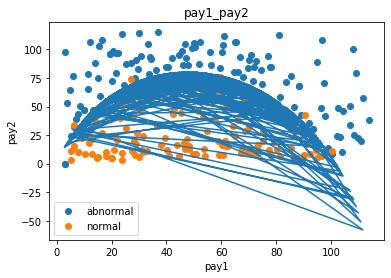

In [36]:
fig2= plt.figure()
abnormal = plt.scatter(pay1[result],pay2[result])
normal = plt.scatter(pay1[~result],pay2[~result])

plt.plot(pay1,pay2_new_2)
plt.title('pay1_pay2')
plt.xlabel('pay1')
plt.ylabel('pay2')
plt.legend((abnormal,normal),('abnormal','normal'))
plt.show()

In [41]:
pay1_sorted = pay1.sort_values()
print(pay1_sorted)

0        2.89738
89       2.89738
155      3.13883
200      3.86318
14       4.82897
         ...    
266    109.13500
92     109.85900
214    110.82500
48     111.54900
243    113.72200
Name: pay1, Length: 273, dtype: float64


In [42]:
a = theta4
b = theta5*pay1_sorted + theta2
c = theta0+theta1*pay1_sorted+theta3*pay1_sorted*pay1_sorted
pay2_new_2 = (-b+np.sqrt(b*b-4*a*c))/(2*a)
print(pay2_new_2)

0      14.370763
89     14.370763
155    15.406907
200    18.400695
14     22.149706
         ...    
266   -37.754813
92    -43.028836
214   -50.998283
48    -57.988155
243          NaN
Name: pay1, Length: 273, dtype: float64


/Users/kylin/pythonData/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


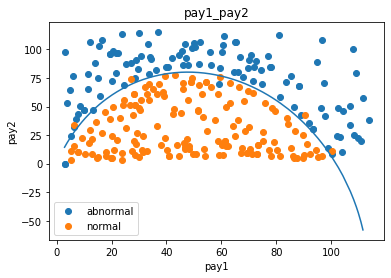

In [43]:
fig3= plt.figure()
abnormal = plt.scatter(pay1[result],pay2[result])
normal = plt.scatter(pay1[~result],pay2[~result])

plt.plot(pay1_sorted,pay2_new_2)
plt.title('pay1_pay2')
plt.xlabel('pay1')
plt.ylabel('pay2')
plt.legend((abnormal,normal),('abnormal','normal'))
plt.show()